In [1]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [2]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_keys

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_keys
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a96743d104f6f96cfcbff869ea5c59fb


In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a96743d104f6f96cfcbff869ea5c59fb&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":46.08,"feels_like":37.8,"temp_min":43,"temp_max":48,"pressure":1028,"humidity":65},"visibility":10000,"wind":{"speed":9.17,"deg":70},"clouds":{"all":90},"dt":1603671368,"sys":{"type":1,"id":3486,"country":"US","sunrise":1603624163,"sunset":1603662411},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.08,
  'feels_like': 37.8,
  'temp_min': 43,
  'temp_max': 48,
  'pressure': 1028,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 70},
 'clouds': {'all': 90},
 'dt': 1603671368,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603624163,
  'sunset': 1603662411},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.08,
  'feels_like': 37.8,
  'temp_min': 43,
  'temp_max': 48,
  'pressure': 1028,
  'humidity': 65},
 'visibility': 10000,
 'wind': {'speed': 9.17, 'deg': 70},
 'clouds': {'all': 90},
 'dt': 1603671368,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1603624163,
  'sunset': 1603662411},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Get the JSON data.
boston_data = city_weather.json()

In [15]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1603624163,
 'sunset': 1603662411}

In [16]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 48 65 90 9.17


In [17]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 26, 0, 16, 8)

In [3]:
import pandas as pd
city_data_to_load = "weather_data\cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Beyneu,KZ,2020-10-26 00:33:22,45.32,55.20,55.35,87,45,15.50
1,1,Jamestown,US,2020-10-26 00:35:11,42.10,-79.24,45.00,70,90,10.29
2,2,Kaiyuan,CN,2020-10-26 00:35:28,23.70,103.30,64.33,74,2,2.21
3,3,Evensk,RU,2020-10-26 00:35:28,61.95,159.23,34.54,86,100,14.43
4,4,Puerto Ayora,EC,2020-10-26 00:35:29,-0.74,-90.35,68.00,83,43,4.00
...,...,...,...,...,...,...,...,...,...,...
570,570,Prince Rupert,CA,2020-10-26 00:37:41,54.32,-130.32,37.40,93,90,10.29
571,571,Shelburne,CA,2020-10-26 00:37:41,44.08,-80.20,41.00,60,90,9.17
572,572,Bowen,AU,2020-10-26 00:35:09,-20.02,148.23,87.80,55,75,10.29
573,573,Perigueux,FR,2020-10-26 00:37:41,45.18,0.72,50.00,91,100,1.01


In [4]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [5]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/25/20'

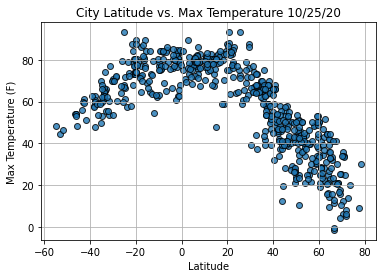

In [8]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

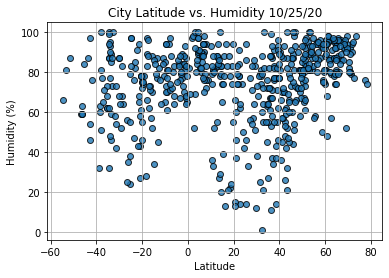

In [9]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

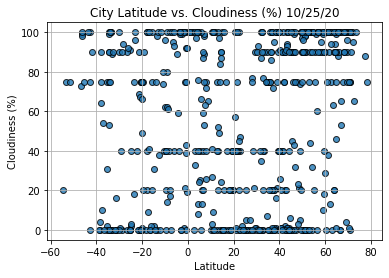

In [10]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

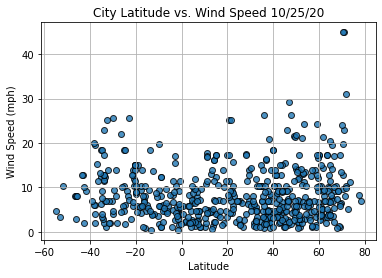

In [11]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()